In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/ML2 Final Project'


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Image size and batch
img_height, img_width = 100, 100
batch_size = 32

# Data preprocessing (rescaling)
datagen = ImageDataGenerator(rescale=1./255)

train_path = os.path.join(data_path, 'training-new')
test_path = os.path.join(data_path, 'testing-new')

# Load training data
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load test data
test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Build a simple CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])






Found 3832 images belonging to 77 classes.
Found 3815 images belonging to 77 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 77)             │         9,933 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,363,021 (16.64 MB)

 Trainable params: 4,363,021 (16.64 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history=model.fit(train_generator, epochs=20)

# Evaluate on test set
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2%}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 3220s 27s/step - accuracy: 0.0751 - loss: 4.0502
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.4596 - loss: 2.0828
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.6715 - loss: 1.2285
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.7515 - loss: 0.8443
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.8277 - loss: 0.5867
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8503 - loss: 0.4886
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.8761 - loss: 0.4013
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8964 - loss: 0.3394
Epoch 9/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.8974 - loss: 0.3096
Epoch 10/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.9115 - loss: 0.2927
Epoch 11/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.9312 - loss: 0.2206
Epoch 12/20
120/120 ━━━━━━━━

In [ ]:
# Save the model
model.save('fruit_classifier_CNN.h5')

In [ ]:
from google.colab import files
files.download("fruit_classifier_CNN.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save_weights("cnn_weights.weights.h5")


In [ ]:
files.download("cnn_weights.weights.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

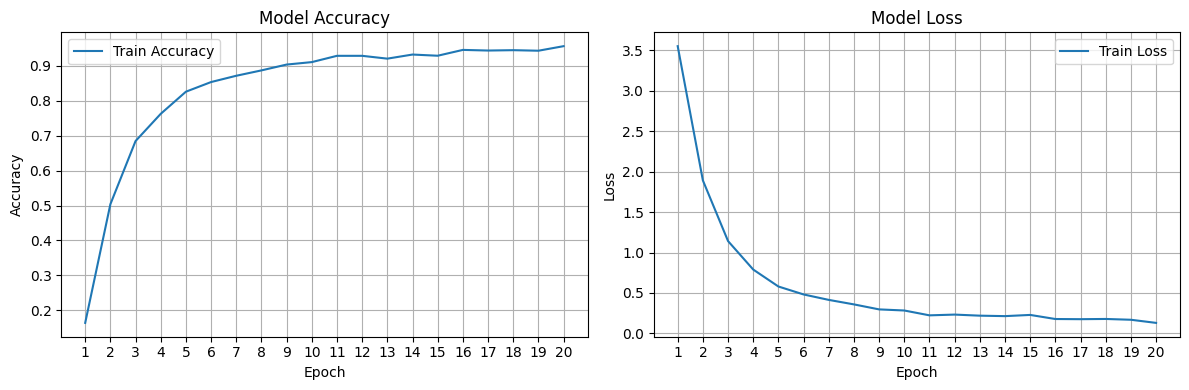

In [7]:
import matplotlib.pyplot as plt

# Number of epochs
epochs = range(1, len(history.history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)  # Set x-axis to whole numbers
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)  # Set x-axis to whole numbers
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
